## Question 1

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [3]:
%%bash
plink \
  --vcf BYxRM_segs_saccer3.bam.simplified.vcf \
  --pca \
  --allow-extra-chr \
  --mind
head plink.eigenvec

PLINK v1.90p 64-bit (16 Jun 2020)              www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to plink.log.
Options in effect:
  --allow-extra-chr
  --mind
  --pca
  --vcf BYxRM_segs_saccer3.bam.simplified.vcf

16384 MB RAM detected; reserving 8192 MB for main workspace.
--vcf: plink-temporary.bed + plink-temporary.bim + plink-temporary.fam written.
16624 variants loaded from .bim file.
1056 people (0 males, 0 females, 1056 ambiguous) loaded from .fam.
Ambiguous sex IDs written to plink.nosex .
105 people removed due to missing genotype data (--mind).
IDs written to plink.irem .
Using up to 4 threads (change this with --threads).
Before main variant filters, 951 founders and 0 nonfounders present.
Calculating allele frequencies... 0%1%2%3%4%5%6%7%8%9%10%11%12%13%14%15%16%17%18%19%20%21%22%23%24%25%26%27%28%29%30%31%32%33%34%

In [4]:
import matplotlib.pyplot as plt

pca1 = []
pca2 = []

with open('plink.eigenvec','r') as f:
    for line in f:
        pca1.append(float(line.split(' ')[2]))
        pca2.append(float(line.split(' ')[3]))
        
len(pca1)

951

Text(0, 0.5, 'PCA axis 2')

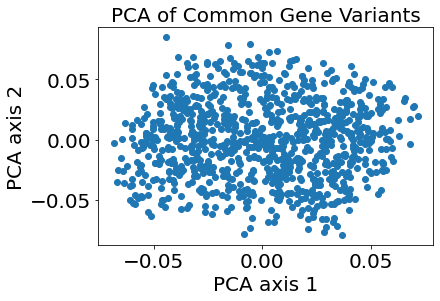

In [6]:
fig,ax = plt.subplots()
plt.rcParams['xtick.labelsize']=20
plt.rcParams['ytick.labelsize']=20
ax.scatter(pca1,pca2)
ax.set_title('PCA of Common Gene Variants',fontsize = 20)
ax.set_xlabel('PCA axis 1',fontsize = 20)
ax.set_ylabel('PCA axis 2',fontsize = 20)

## Question 2

In [7]:
allele_freq = []
with open('BYxRM_segs_saccer3.bam.simplified.vcf','r') as f:
    for line in f:
        if (line[0] != '#'):
            initial = line.split('AF=')[1].split('\t')[0]
            if ',' not in initial:
                allele_freq.append(float(initial))
            else:
                length = len(initial.split(','))
                for i in range(length):
                    allele_freq.append(float(initial.split(',')[i]))

Text(0.5, 1.0, 'Allele Frequency Spectrum')

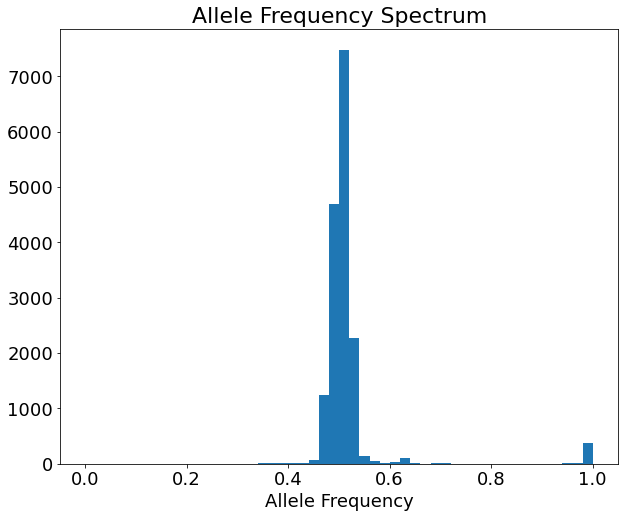

In [18]:
# Create histogram of allele frequency
plt.figure(figsize=(10,8))
plt.rcParams['xtick.labelsize'] = 18
plt.rcParams['ytick.labelsize'] = 18
plt.hist(allele_freq,bins=50)
plt.xlabel('Allele Frequency',fontsize = 18)
plt.title('Allele Frequency Spectrum', fontsize = 22)

## Question 3

In [10]:
phe = open("BYxRM_PhenoData.txt",'r')

outStr = ''
with open("BYxRM_PhenoData.txt",'r') as f:
    for line in f:
        if "Cadmium" in line:
            outStr += line
        else:
            outStr += line[0:3] + '\t' + line[4:len(line)]

with open("BYxRM_PhenoData2.txt",'w') as f:
    f.write(outStr)

In [13]:
%%bash
plink \
  --vcf BYxRM_segs_saccer3.bam.simplified.vcf \
  --pheno BYxRM_PhenoData2.txt \
  --linear \
  --all-pheno \
  --allow-no-sex \
  --covar plink.eigenvec \
  --covar-number 1-10 \
  --allow-extra-chr

PLINK v1.90p 64-bit (16 Jun 2020)              www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to plink.log.
Options in effect:
  --all-pheno
  --allow-extra-chr
  --allow-no-sex
  --covar plink.eigenvec
  --covar-number 1-10
  --linear
  --pheno BYxRM_PhenoData2.txt
  --vcf BYxRM_segs_saccer3.bam.simplified.vcf

16384 MB RAM detected; reserving 8192 MB for main workspace.
--vcf: plink-temporary.bed + plink-temporary.bim + plink-temporary.fam written.
16624 variants loaded from .bim file.
1056 people (0 males, 0 females, 1056 ambiguous) loaded from .fam.
Ambiguous sex IDs written to plink.nosex .
799 phenotype values present after --pheno.
Using 1 thread (no multithreaded calculations invoked).
--covar: 10 out of 20 covariates loaded.
105 people were not seen in the covariate file.
Before main variant filters, 1056 founders and 0 nonfounders present.
Calculating allele frequencies... 0%1%2%3%4%5%6%7%

## Question 4

46


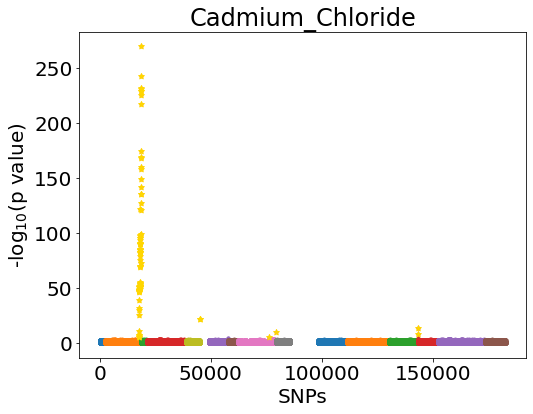

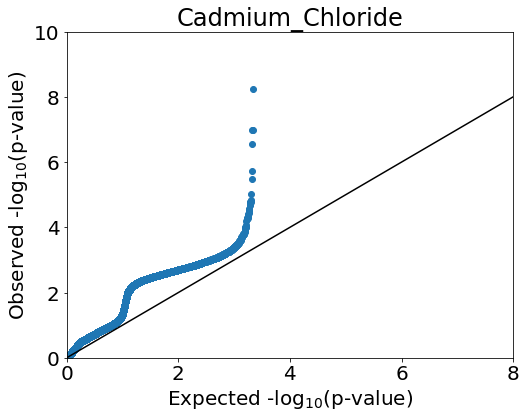

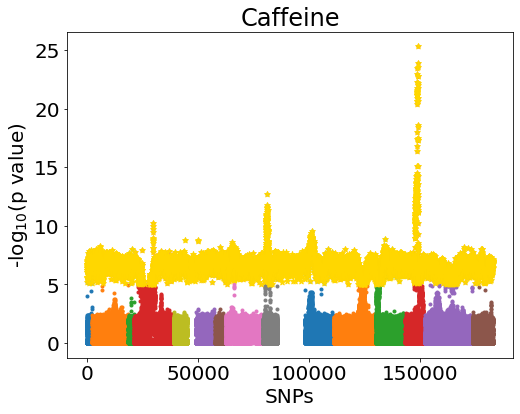

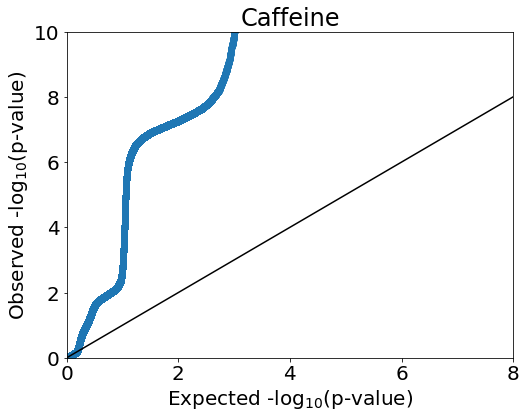

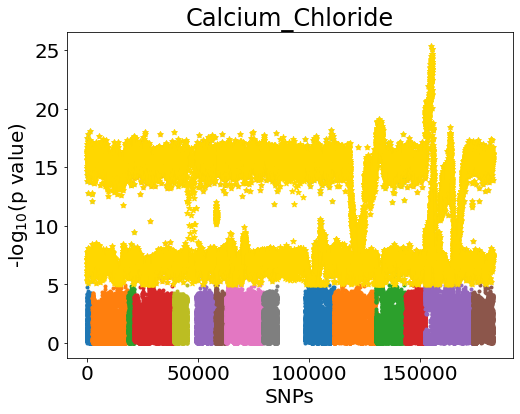

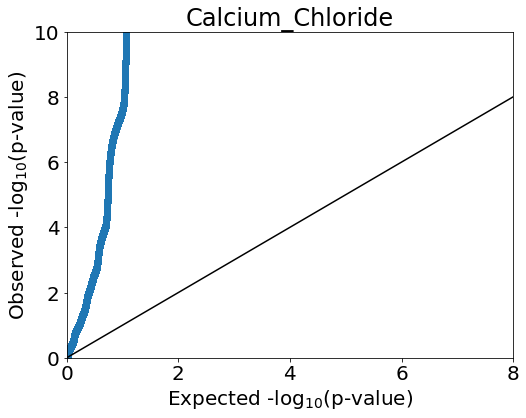

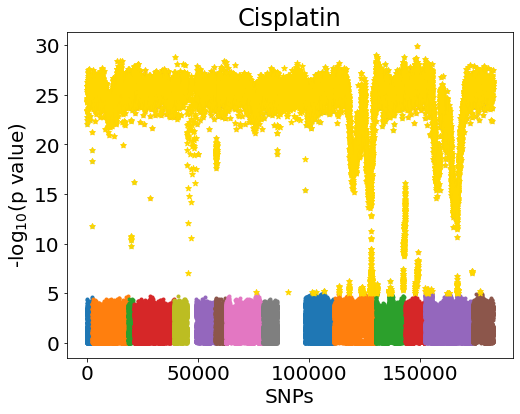

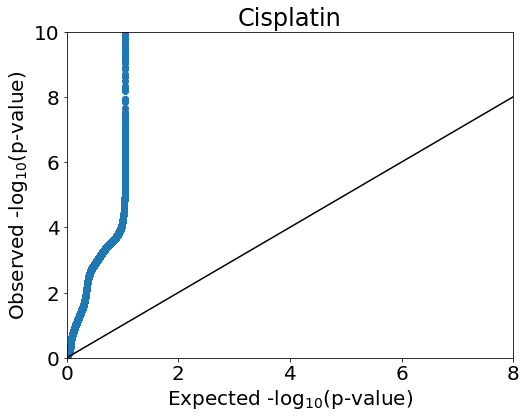

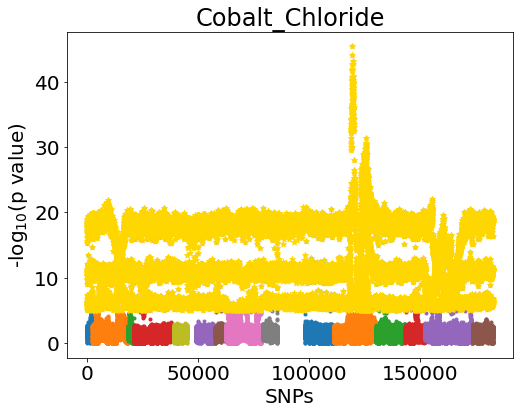

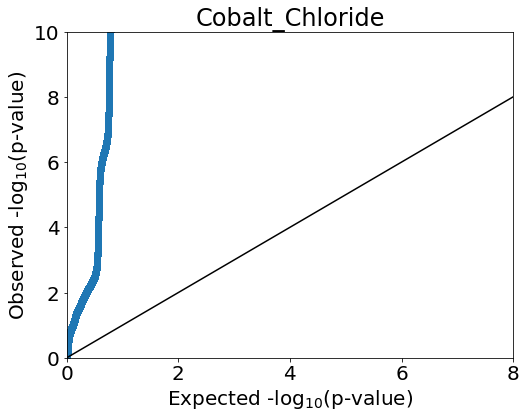

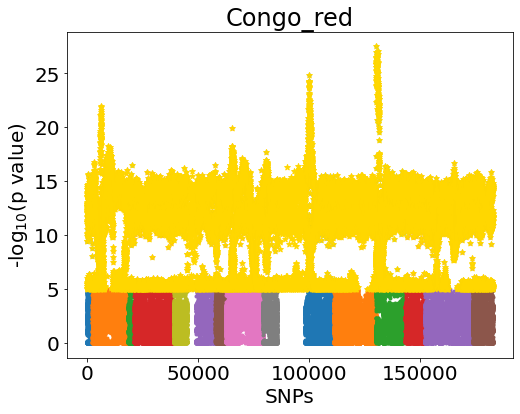

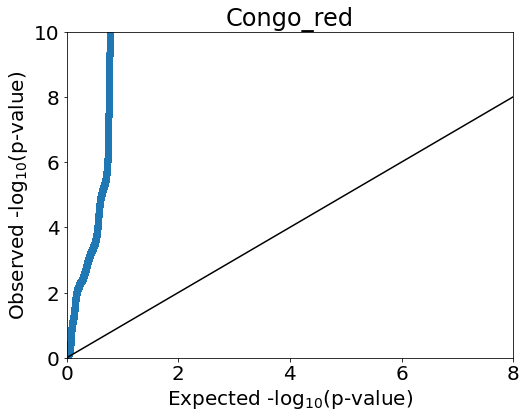

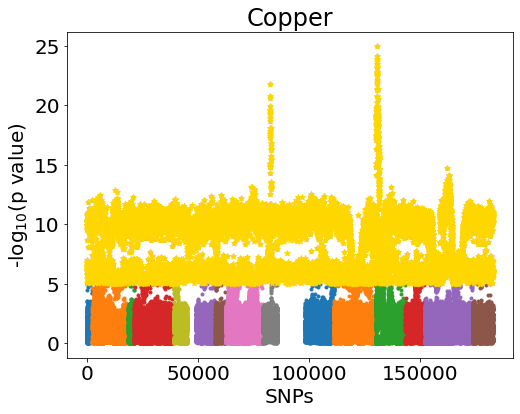

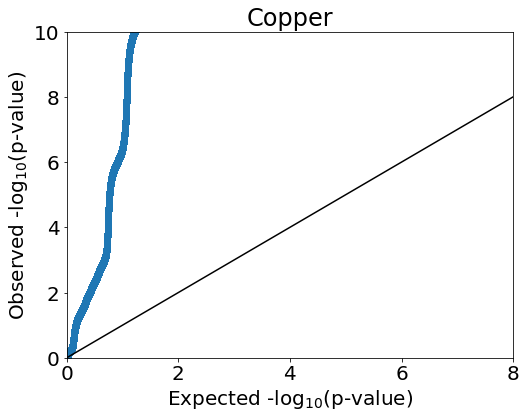

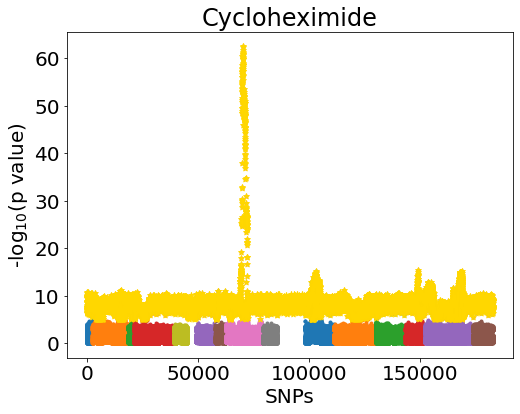

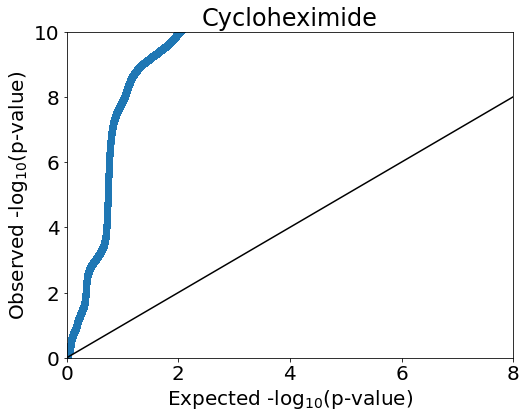

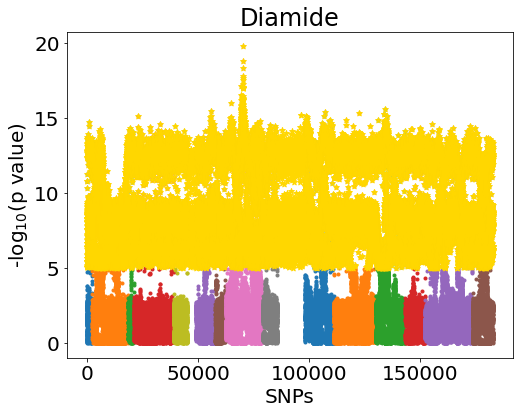

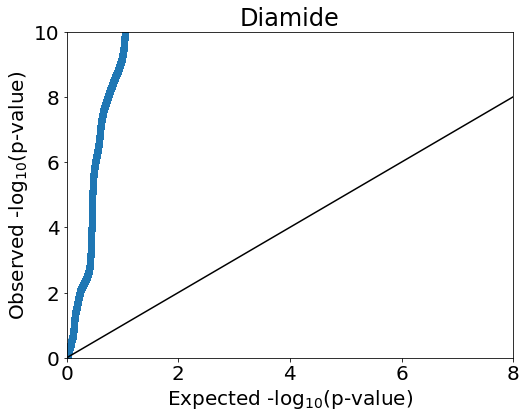

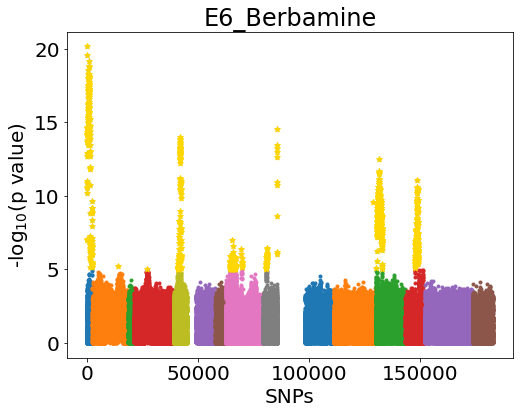

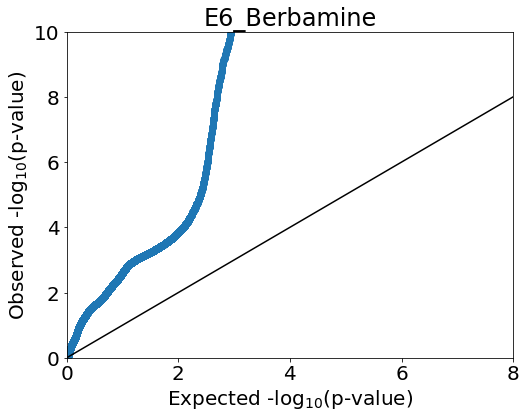

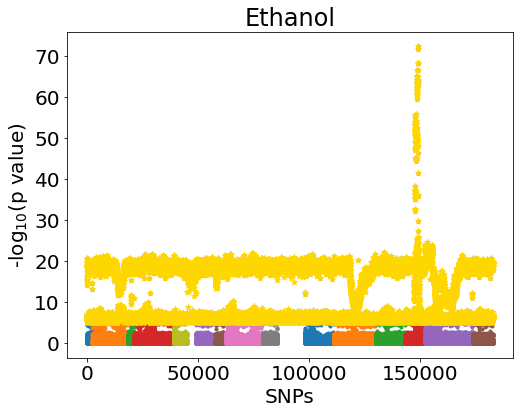

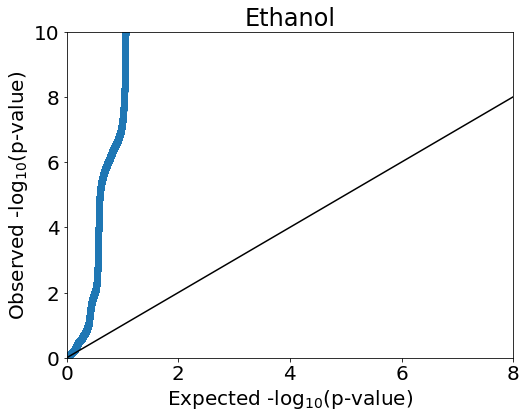

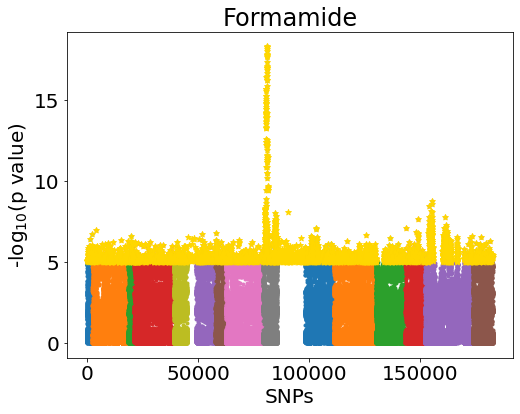

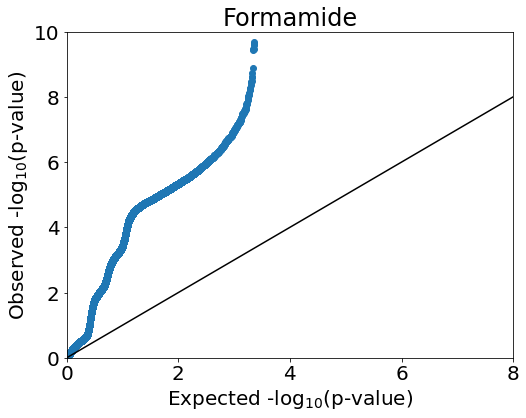

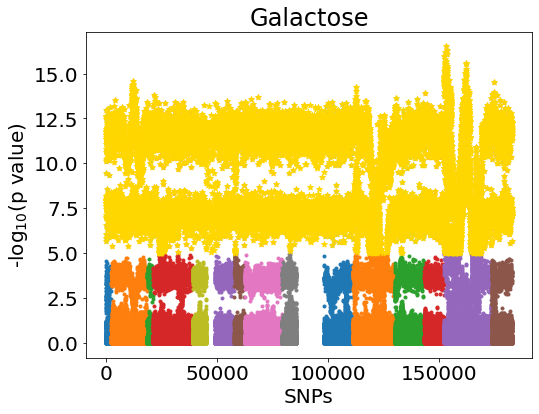

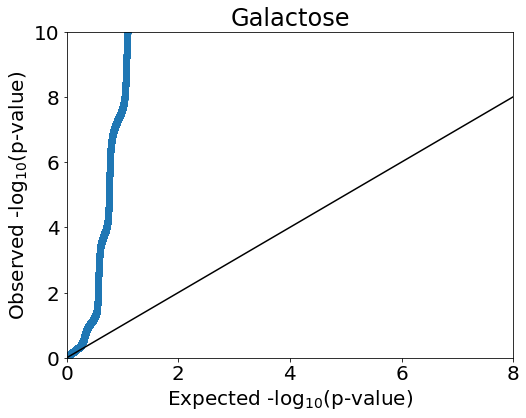

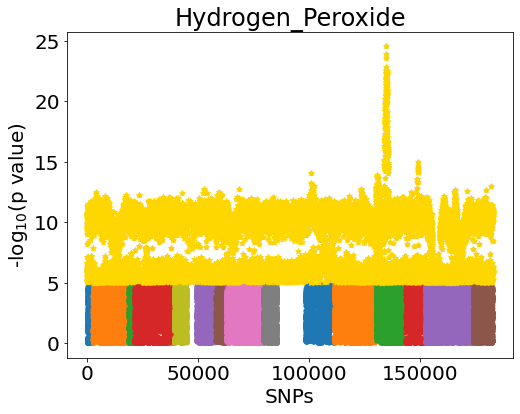

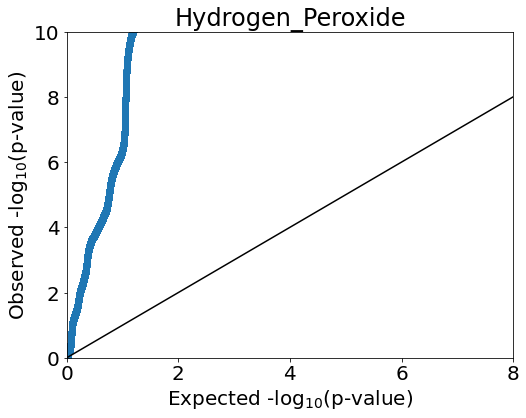

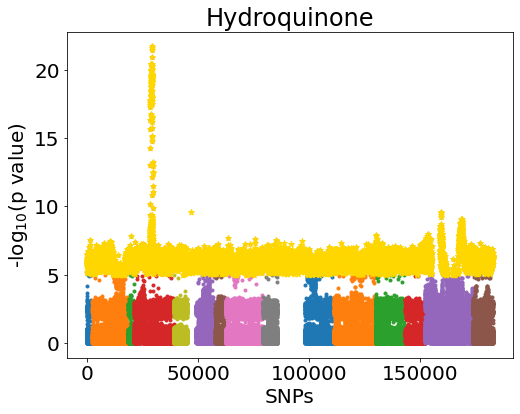

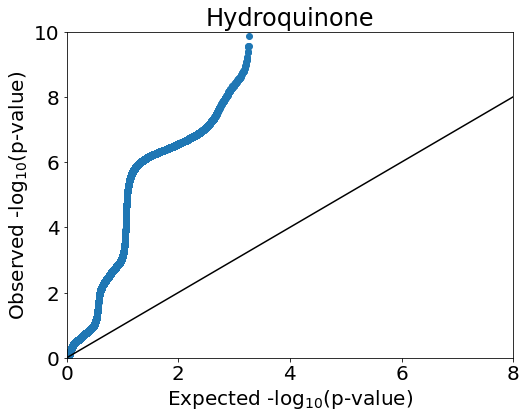

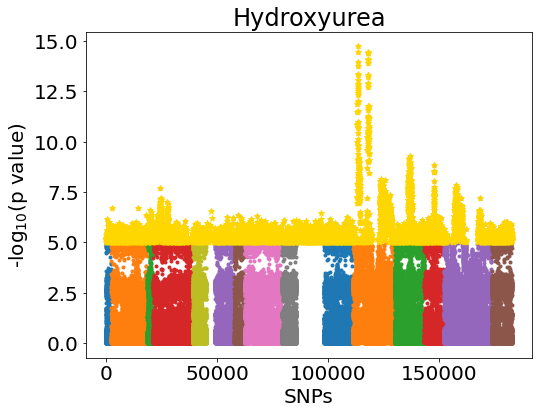

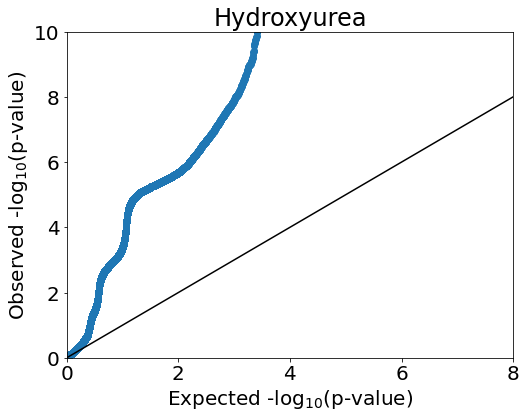

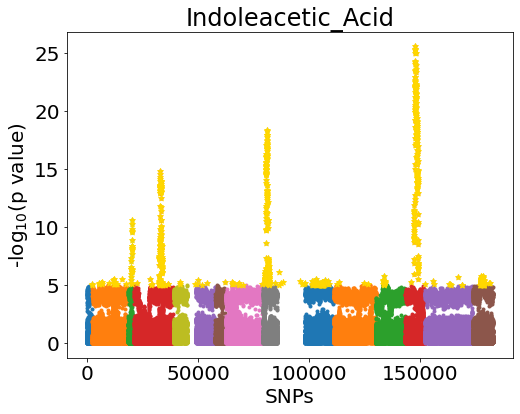

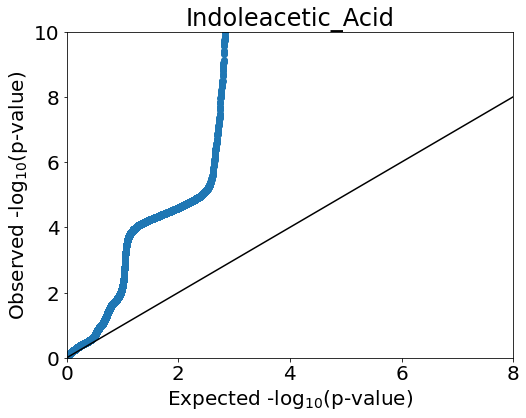

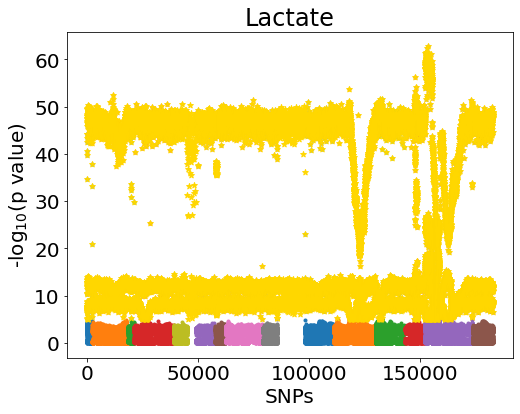

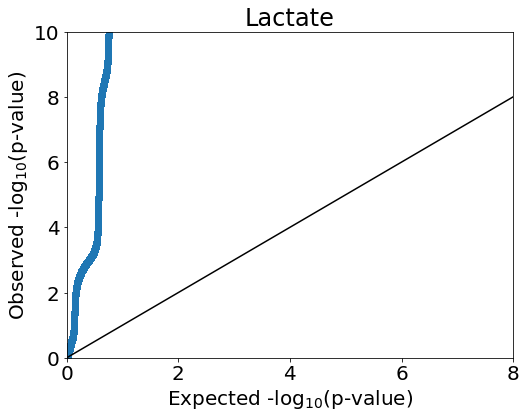

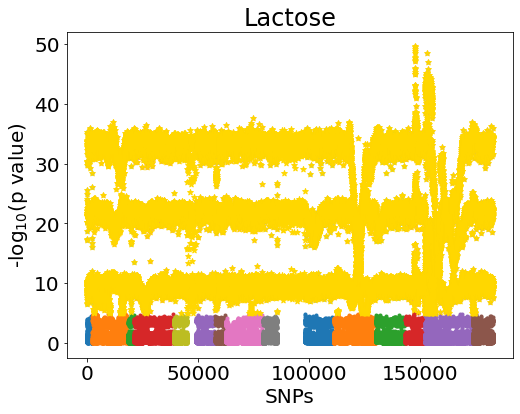

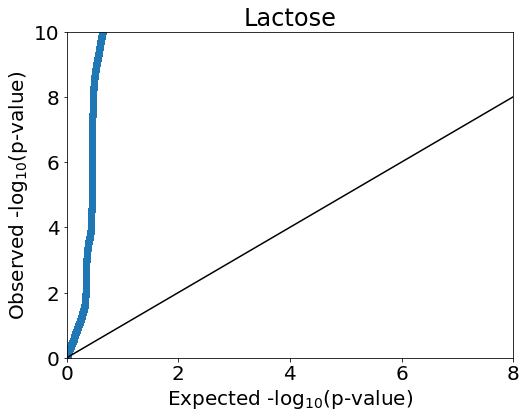

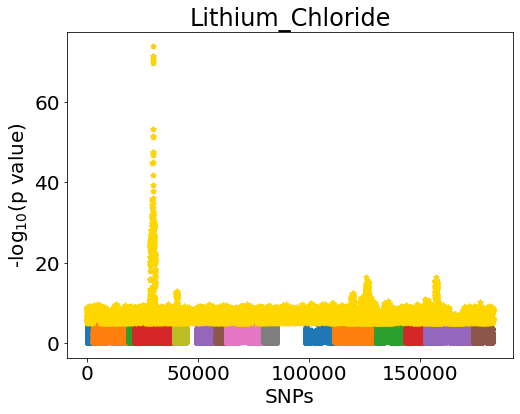

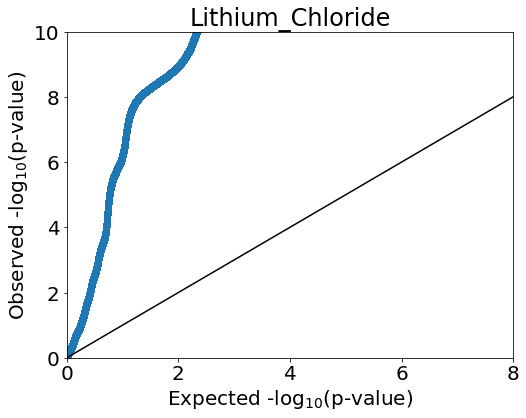

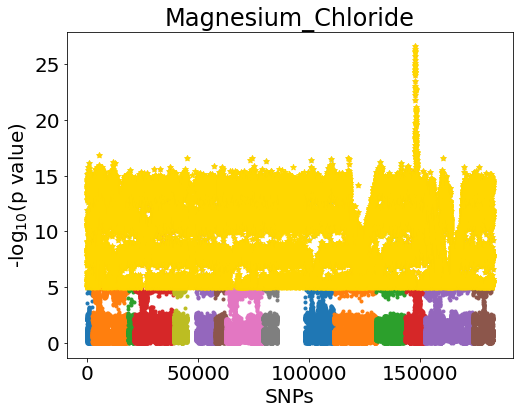

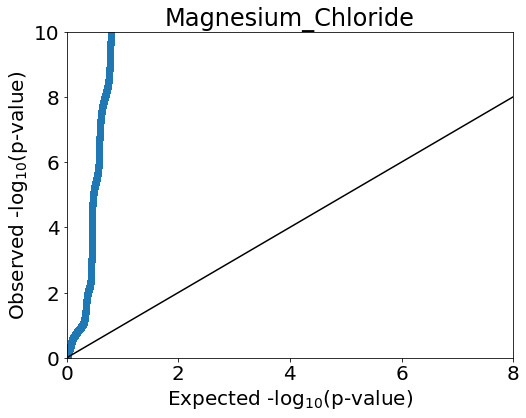

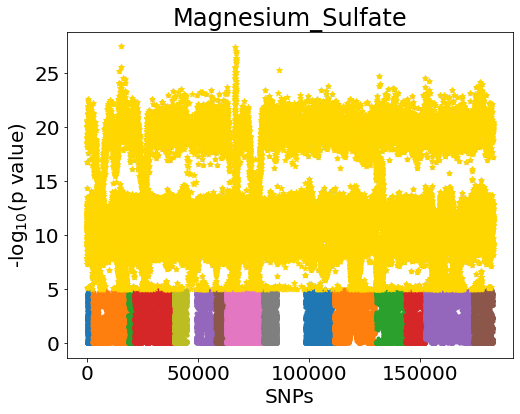

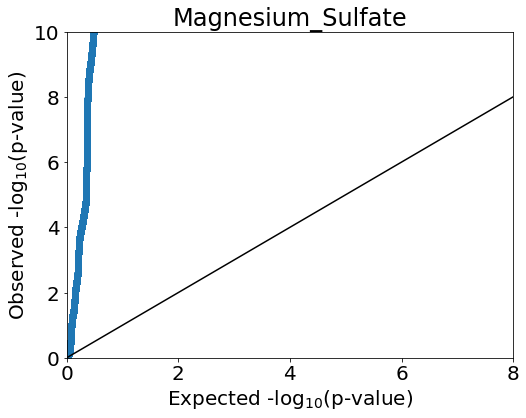

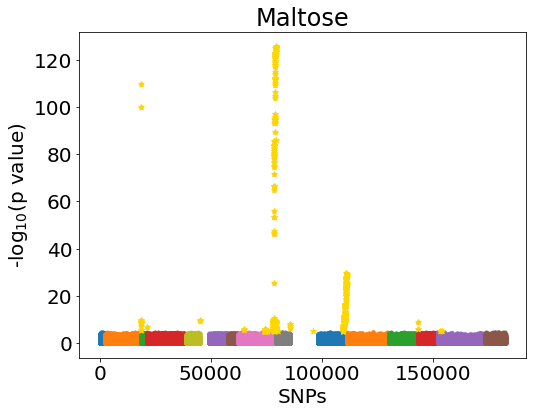

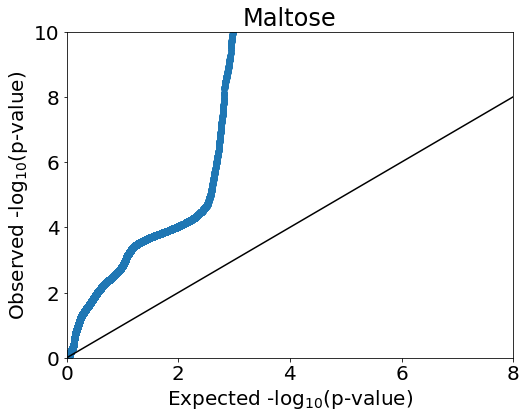

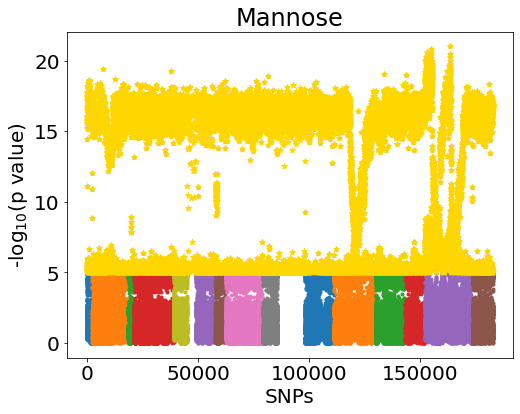

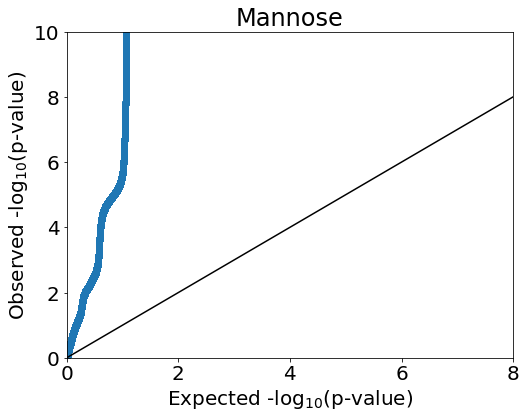

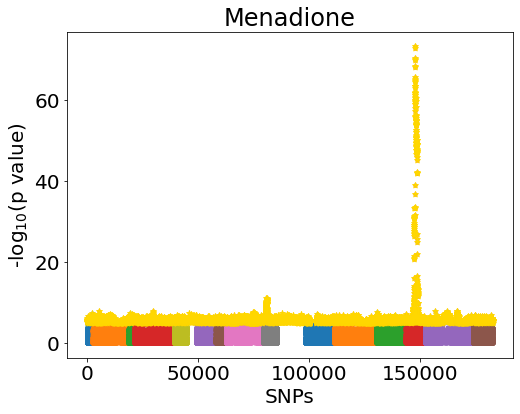

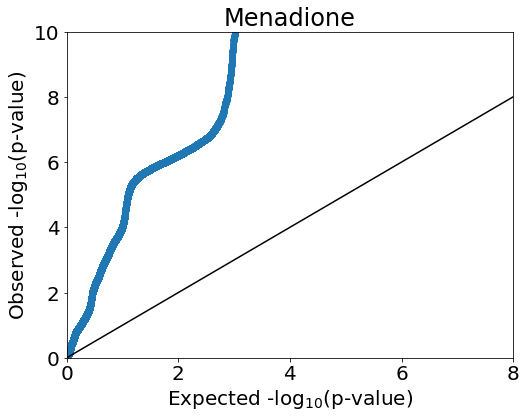

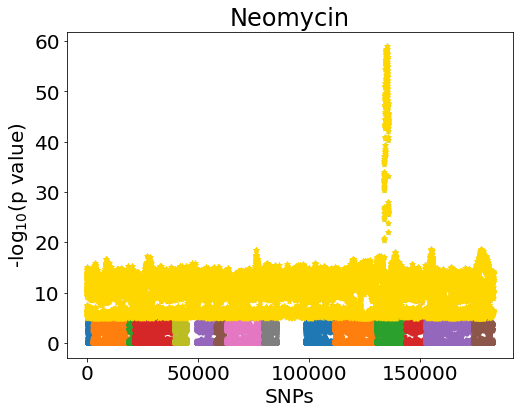

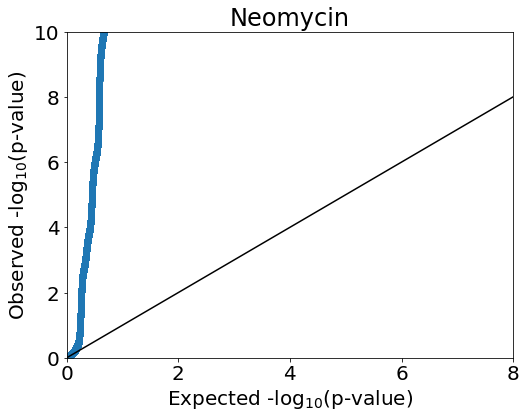

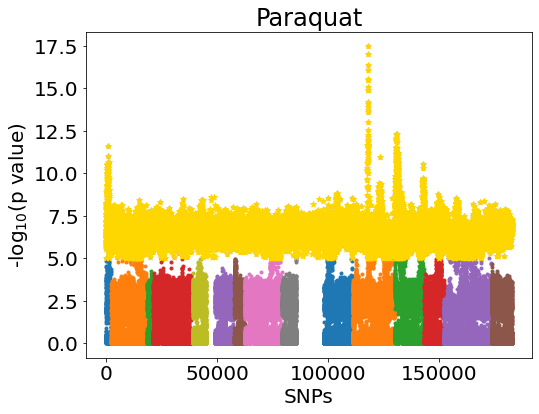

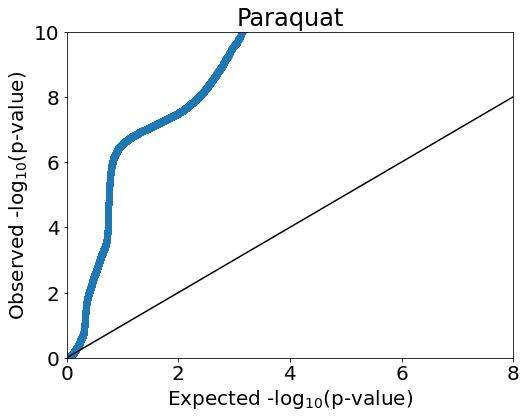

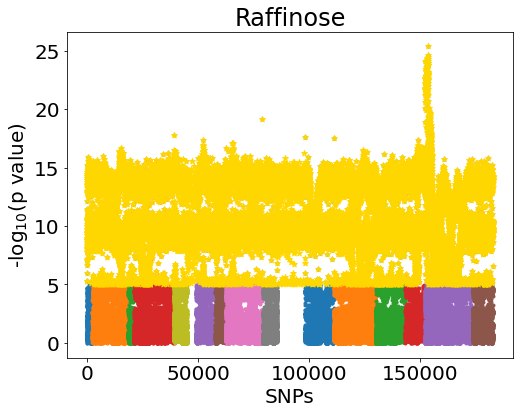

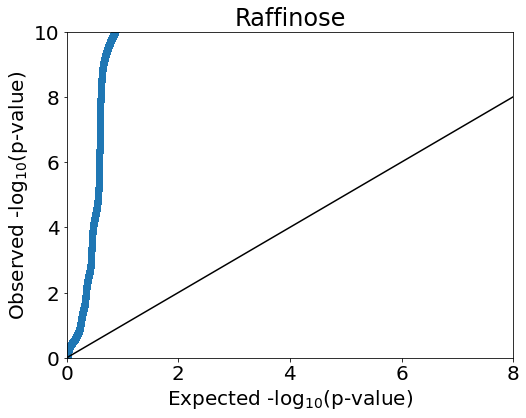

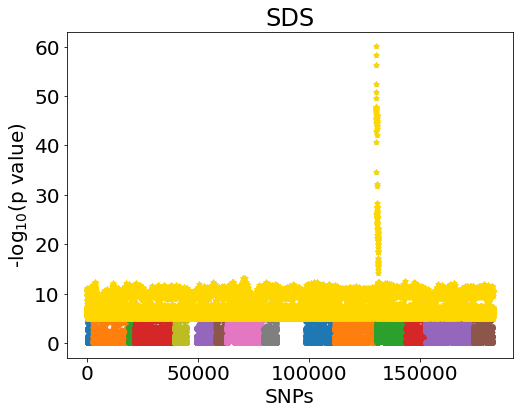

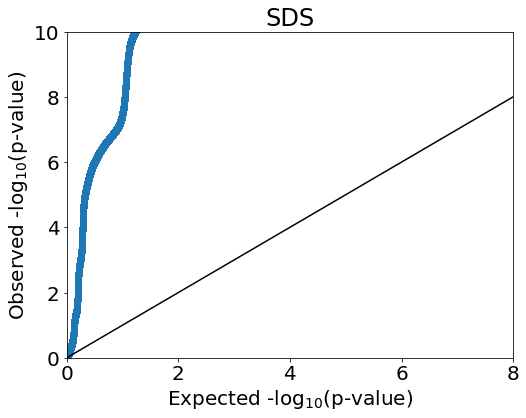

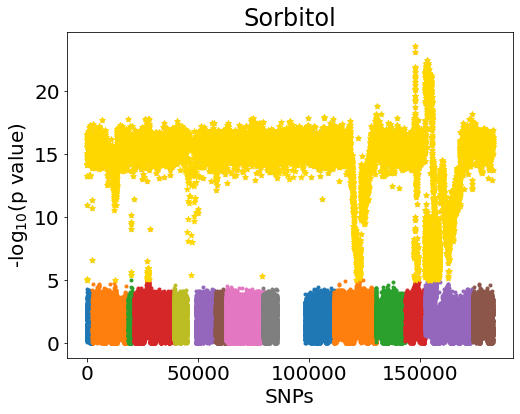

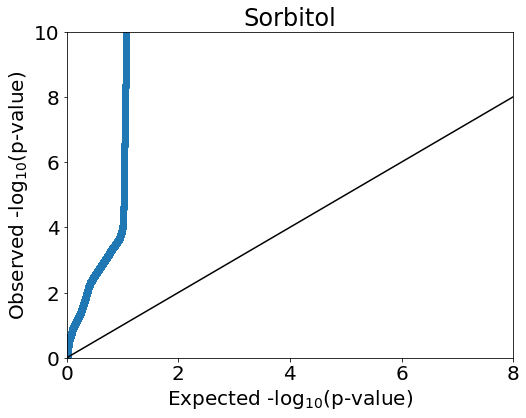

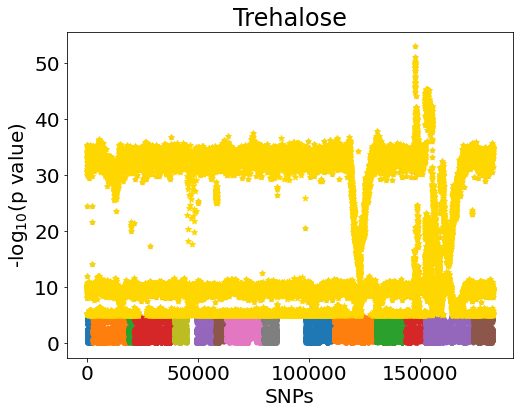

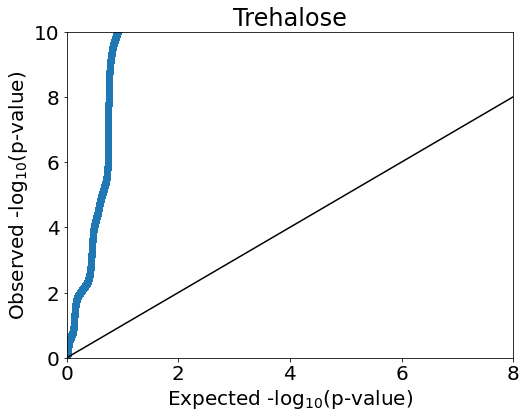

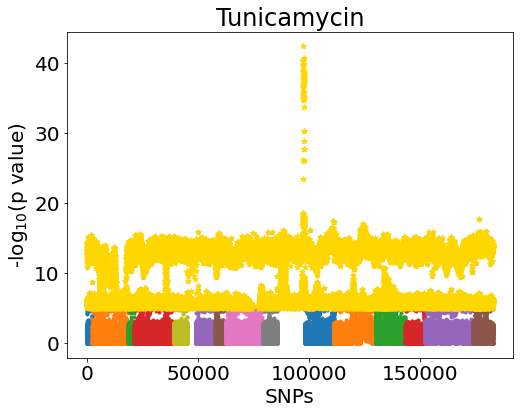

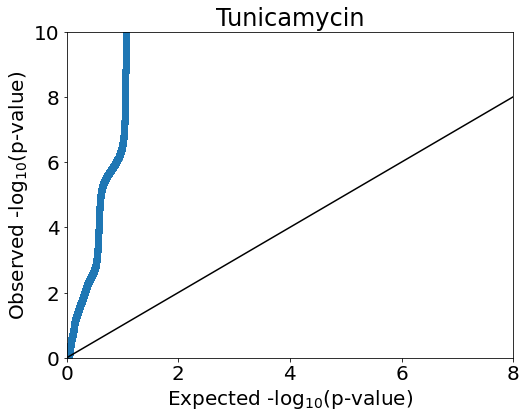

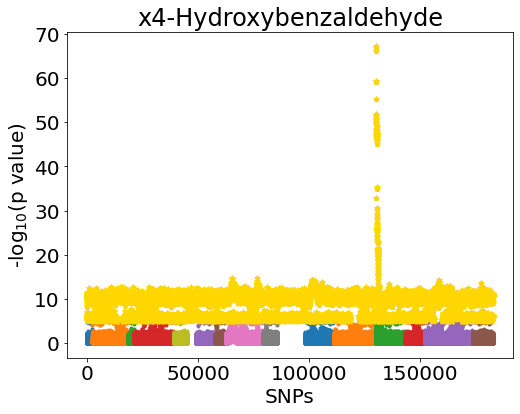

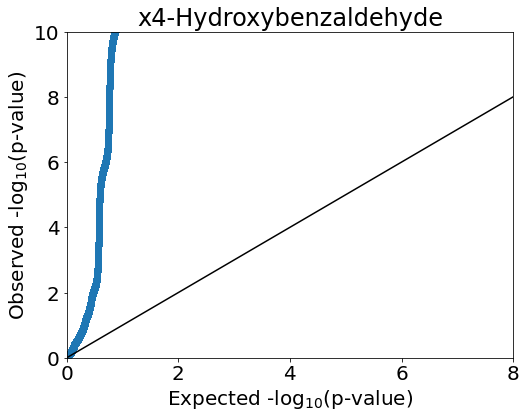

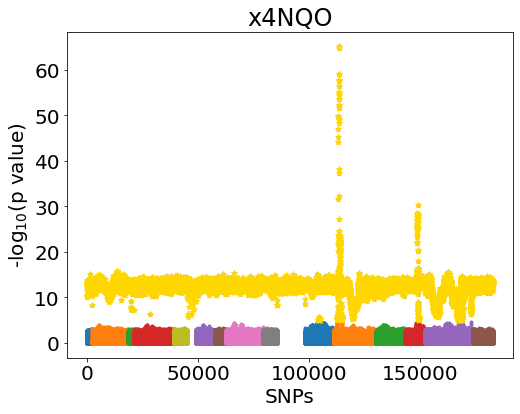

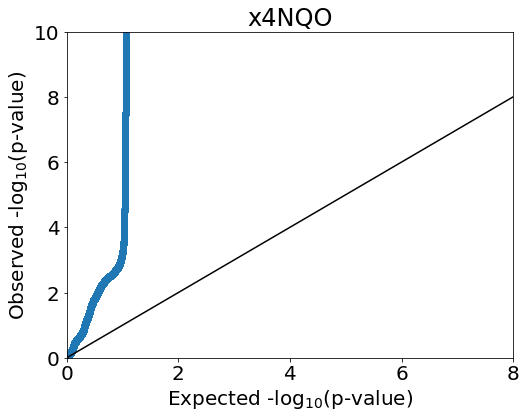

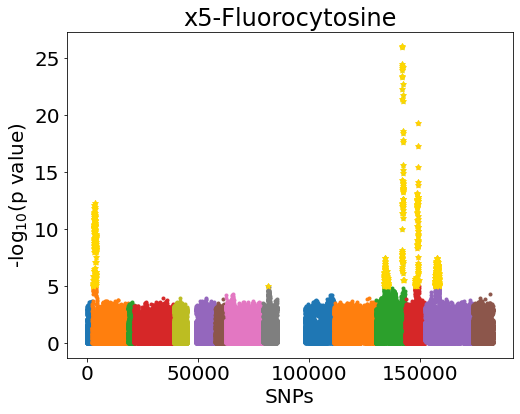

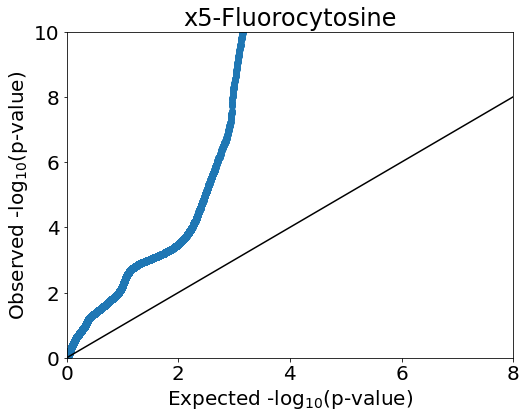

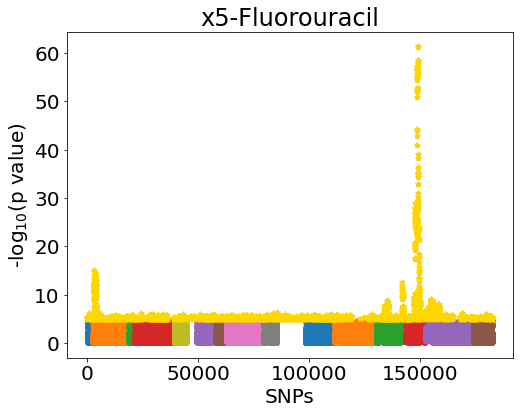

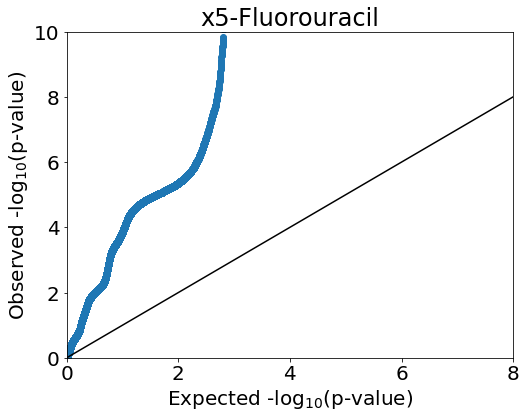

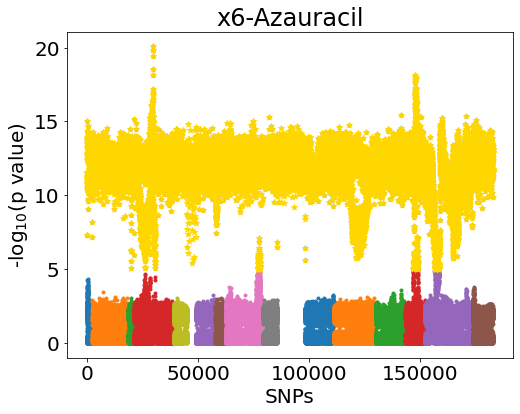

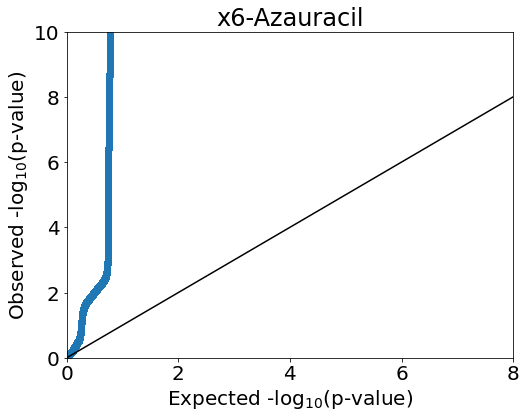

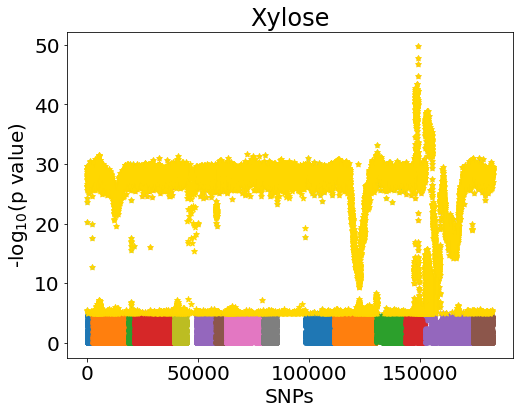

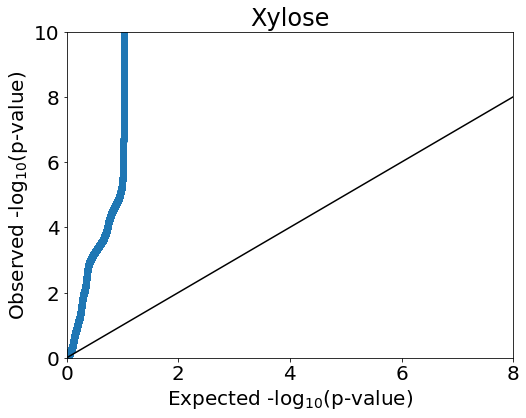

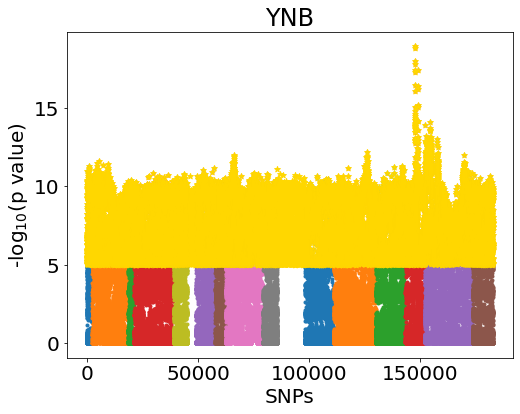

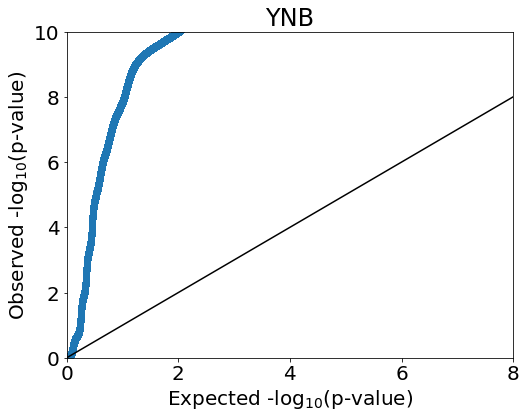

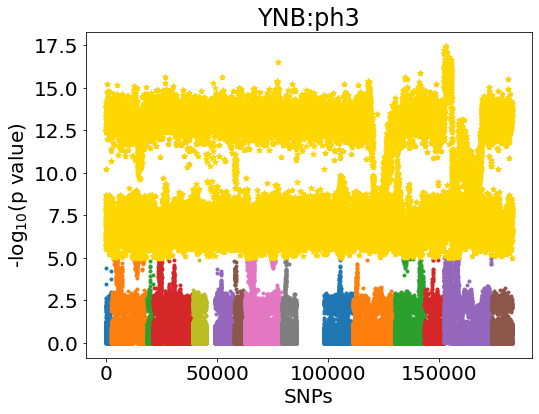

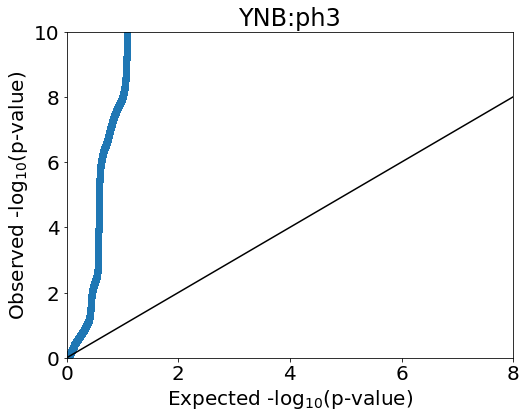

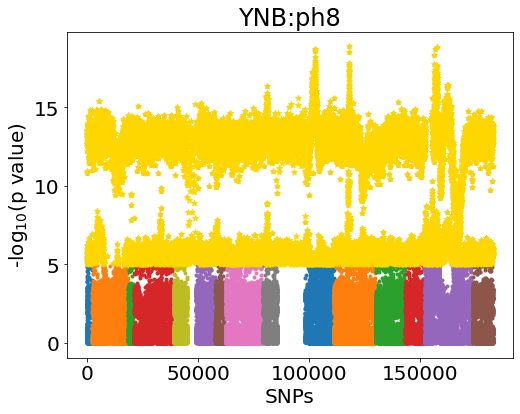

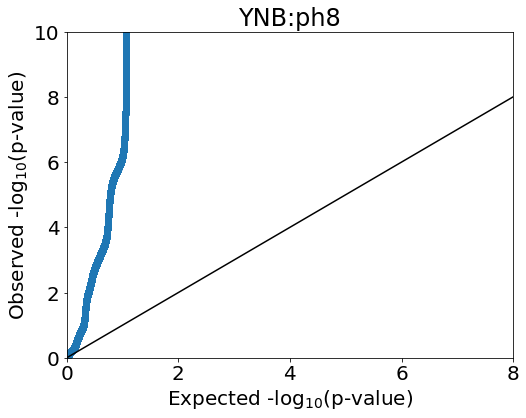

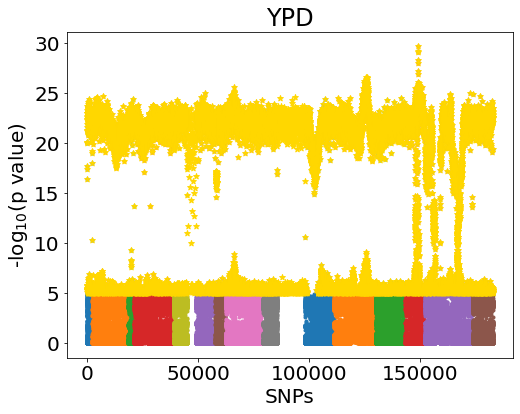

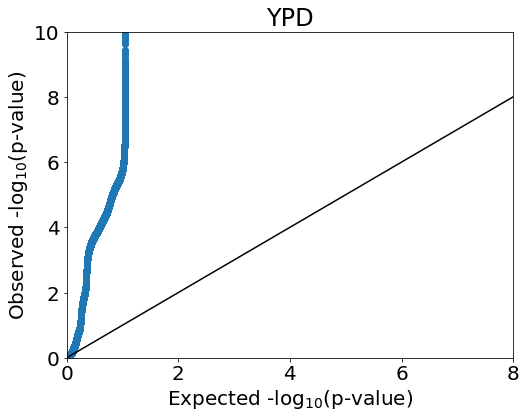

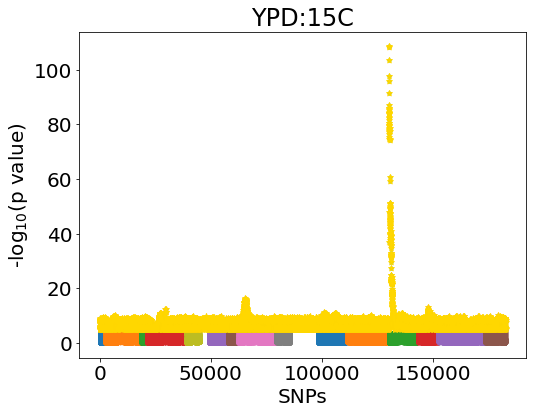

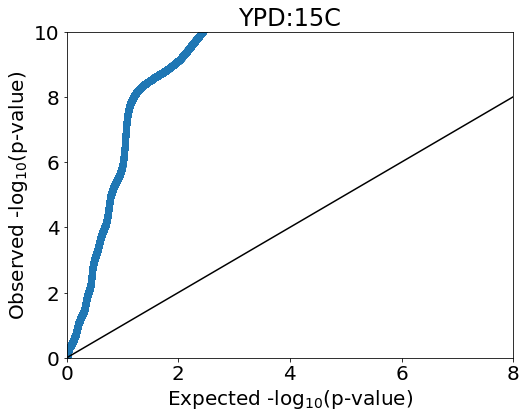

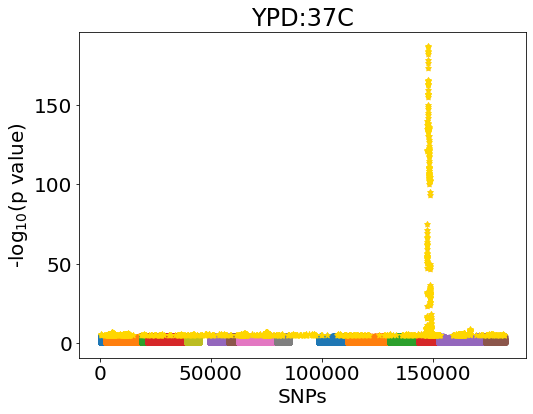

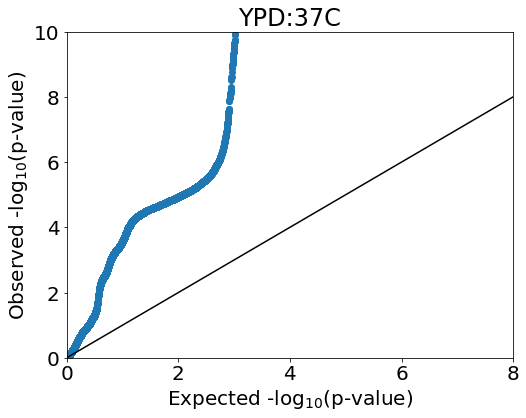

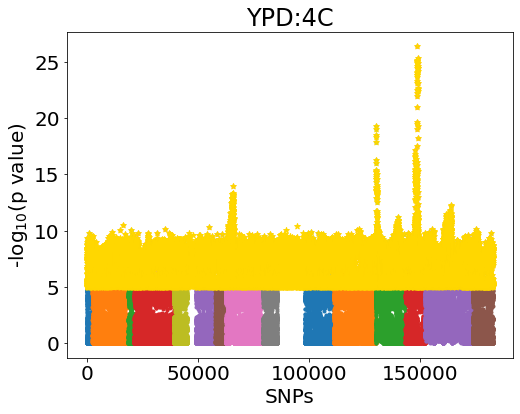

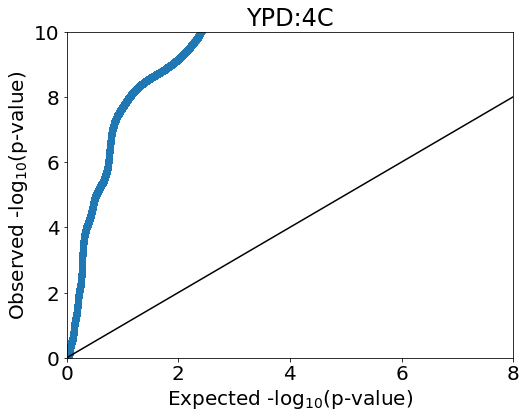

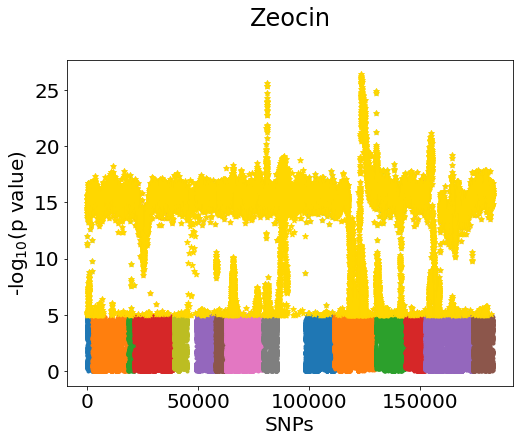

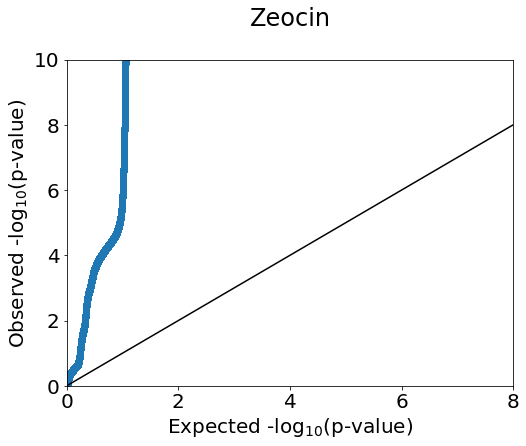

In [39]:
# Create list of phenotypes
lstPhe = []
with open("BYxRM_PhenoData.txt",'r') as f:
    for line in f:
        if "Cadmium" in line:
            lstPhe = line.split("\t")
        else:
            break
            
lstPhe.pop(0)
print(len(lstPhe))
chromosomes=["chrI","chrII","chrIII","chrIV","chrV","chrVI","chrVII","chrVIII","chrIX","chrX","chrXI","chrXII","chrXIII","chrXIV","chrXV","chrXVI"]

for i in range(1,47):
    # get the file name for the association data
    f_in = "plink.{name}.assoc.linear".format(name = "P" + str(i))
    # reads pandas df for gwas and adds log p value
    gwas = pd.read_csv(f_in,sep = "\s+")
    gwas['logP'] = -1 * np.log10(gwas['P'])
    gwas['snp_index'] = range(len(gwas))
    
    # plot the manhattan plot
    fig, ax = plt.subplots(figsize=(8,6))
    for ch in chromosomes:
    # color codes non-significant snps by chromosome
        ax.scatter(gwas["snp_index"][gwas["CHR"]==ch], gwas["logP"][gwas["CHR"]==ch], marker = '.')
    sig = gwas.loc[gwas["logP"] > 5]
    ax.scatter(sig["snp_index"],sig["logP"],color = "gold", marker = '*')
    plt.xlabel("SNPs",fontsize=20)
    plt.ylabel(r"-log$_{10}$(p value)",fontsize=20)
    plt.rcParams['xtick.labelsize'] = 20
    plt.rcParams['ytick.labelsize'] = 20
    plt.title(lstPhe[i-1],fontsize=24)
    plt.show()
    plt.close('all')
    
    # QQ plot
    gwas_sorted = gwas.sort_values(by = "P")
    gwas_sorted['uniform_points'] = range(0, len(gwas_sorted))
    gwas_sorted['uniform_pval'] = (gwas_sorted['uniform_points'] + 1) / len(gwas_sorted)
    gwas_sorted['uniform_logP'] = -1 * np.log10(gwas_sorted['uniform_pval'])
    gwas['snp_index'] = range(len(gwas))
    
    fig, ax = plt.subplots(figsize=(8,6))
    ax.scatter(gwas_sorted["uniform_logP"], gwas_sorted["logP"])
    ax.plot([8,0], [8, 0], color = "black")

    plt.xlim([0, 8])
    plt.ylim([0, 10])
    plt.xlabel(r"Expected -log$_{10}$(p-value)",fontsize = 20)
    plt.ylabel(r"Observed -log$_{10}$(p-value)",fontsize = 20)
    plt.rcParams['xtick.labelsize'] = 20
    plt.rcParams['ytick.labelsize'] = 20
    plt.title(lstPhe[i-1],fontsize=24)
    plt.show()
    plt.close('all')

## Question 5

In [40]:
# get the maximum SNP from cadmium chloride
p1 = pd.read_csv("plink.P1.assoc.linear", sep = "\s+")
p1['logP'] = -1 * np.log10(p1['P'])
p1_sorted = p1.sort_values(by = "logP",ascending=False)
p1_sorted

CHR SNP      BP A1   TEST  NMISS   BETA   STAT              P  \
18447    chrII   .  795756  C    ADD    706 -5.762 -58.53  1.300000e-270   
18458    chrII   .  798782  A    ADD    713 -5.621 -52.27  4.736000e-244   
18469    chrII   .  799317  A    ADD    707 -5.574 -50.16  3.872000e-233   
18480    chrII   .  799991  G    ADD    712 -5.567 -49.79  3.325000e-232   
18513    chrII   .  800746  C    ADD    720  5.521  49.16  1.957000e-230   
...        ...  ..     ... ..    ...    ...    ...    ...            ...   
182089  chrXVI   .  890346  T   COV6    673    NaN    NaN            NaN   
182090  chrXVI   .  890346  T   COV7    673    NaN    NaN            NaN   
182091  chrXVI   .  890346  T   COV8    673    NaN    NaN            NaN   
182092  chrXVI   .  890346  T   COV9    673    NaN    NaN            NaN   
182093  chrXVI   .  890346  T  COV10    673    NaN    NaN            NaN   

              logP  
18447   269.886057  
18458   243.324588  
18469   232.412065  
18480   231.478208  
18513   229.708409  
...            ...  
182089         NaN  
182090         NaN  
182091         NaN  
182092         NaN  
182093         NaN  

[182864 rows x 10 columns]

The top SNP from cadmium chloride has a log(p-value) of ~270. The index is 18447 and the basepair location is 795756.

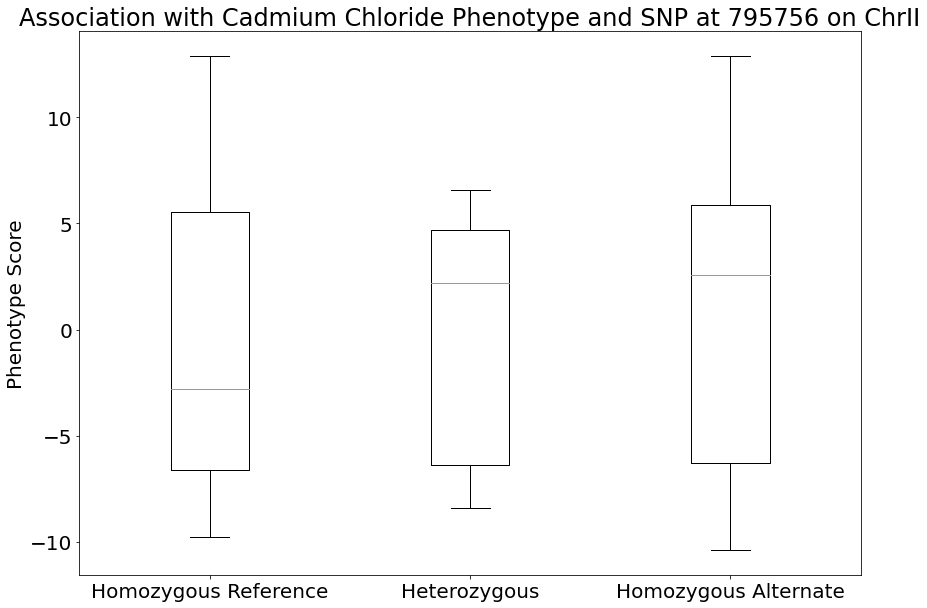

In [66]:
# extract the list of genotypes
genotypes = []
with open("BYxRM_segs_saccer3.bam.simplified.vcf",'r') as f:
    for line in f:
        if "chrII" and "795756" in line:
            genotypes = line.split("GT:DP")[1].split('\t')

genotypes.pop(0)
# reformat genotypes
for i in range(len(genotypes)):
    genotypes[i] = genotypes[i].split(':')[0]

# extract list of phenotypes
phe_vals = []
with open("BYxRM_PhenoData.txt",'r') as f:
    for line in f:
        if "Cadmium" not in line:
            phe_vals.append(line.split("\t")[1])
        
# create dictionary of genotypes (sort phenotypes)
gen_dict={}
gen_dict['0/0']=[]
gen_dict['0/1']=[]
gen_dict['1/1']=[]
gen_dict['./.']=[]

for i in range(len(phe_vals)):
    if (phe_vals[i] != 'NA'):
        gen_dict[genotypes[i]].append(float(phe_vals[i]))

# Create boxplot
data=list(gen_dict.values())
fig, ax = plt.subplots(figsize = (14,10))
plt.boxplot(data[:3])
ax.set_title("Association with Cadmium Chloride Phenotype and SNP at 795756 on ChrII", fontsize = 24)
ax.set_xticklabels(["Homozygous Reference","Heterozygous","Homozygous Alternate"],fontsize = 20)
plt.ylabel("Phenotype Score",fontsize = 20)
plt.savefig("boxplot.png")
plt.show()